# <font color='blue'>Tratamento de Dados - Funções auxiliares</font>

## Construindo um Vetor de Features

As redes neurais e outros algoritmos exigem que suas entradas sejam um número fixo de colunas. Isso é muito semelhante aos dados de uma planilha. Esta entrada deve ser completamente numérica.

É importante representar os dados de forma a que a rede neural possa se formar a partir deles. Vejamos quais são algumas das formas mais básicas de transformar dados para uma rede neural, começando pelos possíveis tipos de dados:

* Dados do Tipo Caracter (strings)
    * **Nominal** - Itens discretos individuais, sem ordem. Por exemplo: cor, código postal, forma.
    * **Ordinal** - Itens discretos individuais que podem ser ordenados. Por exemplo: nível de classificação, título do trabalho, tamanho de uma roupa (pequeno, médio, grande)
    
    
* Dados Numéricos
    * **Interval** - Valores numéricos, início não definido. Por exemplo, a temperatura. Você nunca diria "ontem foi duas vezes mais quente do que hoje".
    * **Ratio** - Valores numéricos, início claramente definido. Por exemplo, a velocidade. Você diria que "O primeiro carro está indo duas vezes mais rápido do que o segundo".

Abaixo você vai encontrar várias funções úteis para codificar o vetor de recursos para vários tipos de dados. 

* **encode_text_dummy** - Encoding de campos de texto, como as espécies de íris como um único campo para cada classe. Três classes se tornariam "0,0,1" "0,1,0" e "1,0,0". Podemos fazer o encoding dos preditores não-alvo dessa maneira. Bom para dados nominais.
* **encode_text_index** - Encoding dos campos de texto, como um único campo numérico como "0" "1" e "2". Bom para dados nominais.
* **encode_numeric_zscore** - Encoding dos valores numéricos com um escore z. As redes neurais lidam bem com os campos "centrados", o zscore geralmente é um bom ponto de partida para o intervalo / proporção.

* Os valores ordinais podem ser codificados com as funções dummy ou index. Mais tarde, veremos um meio mais avançado de encoding *

Tratamento de dados missing:

* **missing_median** - Preenche todos os valores faltantes com o valor médio.

Criando o vetor final de recursos:

* **to_xy** - Uma vez que todos os campos são numéricos, esta função pode fornecer as matrizes x e y que são usadas para caber na rede neural.

Outras funções de utilidade:

* **hms_string** - Imprima uma sequência de tempo decorrido.
* **chart_regression** - Exibe um gráfico para mostrar o quão bem uma regressão executa.

## Normalização

Normalmente, os dados são dimensionados para um intervalo específico em um processo chamado normalização. 

Uma transformação usual durante o treinamento de uma RNA é normalizar o conjunto de dados de treinamento de acordo com a distribuição normal padrão (i.e., média igual a zero e variância igual a 1) para evitar problemas de comparação devido às diferentes escalas usadas nos dados. Ocorre que durante a passagem dos exemplos normalizados através das
camadas da rede, esses valores são novamente transformados (por meio das pré-ativações e ativações), podendo fazer com que os dados de entrada de algumas camadas ocultas fiquem desnormalizados novamente. Esse problema, conhecido como mudança de co-variável interna (internal covariate shift), é tanto mais grave quanto mais profunda for a rede a ser treinada. Esse problema aumenta o tempo de treinamento porque implica na definição de uma taxa de aprendizagem pequena, além de propiciar a dissipação dos gradientes.

A Normalização em Lote (Batch Normalization) é um mecanismo proposto recentemente para resolver o problema acima, e que consiste em normalizar os dados fornecidos a cada camada oculta. A normalização é aplicada em cada mini-lote (como já fizemos em exemplos anteriores), para aumentar a eficiência durante a aplicação da transformação. De acordo com os experimentos realizados pelos autores da técnica (link na seção de links úteis), ela também produz um efeito de regularização sobre o treinamento, em alguns casos eliminando a necessidade de aplicar o desligamento (Dropout). Uma aceleração significativa do tempo de treinamento também foi observada, resultante da diminuição de 14 vezes na quantidade de passos de treinamento necessários, quando comparada ao tempo de treinamento sem o uso da normalização.

Existem muitas maneiras diferentes de normalizar os dados. Vejamos algumas delas:

### One Hot Encoding

Se você tem um valor categórico, como a espécie de uma íris, a marca de um automóvel ou a etiqueta de dígitos no conjunto de dados MNIST, você deve usar uma codificação One-Hot Encoding. Para codificar dessa maneira, você usaria um neurônio de saída para cada classe no problema. Lembra do conjunto de dados MNSIT que já usamos em outras oportunidades, onde você tem imagens para dígitos entre 0 e 9? Este problema é mais comumente codificado como dez neurônios de saída com uma função de ativação softmax que dá a probabilidade de a entrada ser um desses dígitos. Usando a codificação One-Hot, os dez dígitos podem ser codificados da seguinte maneira:

![One-Hot Encoding](images/one-hot.png "One-Hot Encoding")

One-Hot Encoding sempre deve ser usado quando as classes não têm ordenação. Outro exemplo desse tipo de codificação é a marca de um automóvel. Normalmente, a lista de fabricantes de automóveis não está ordenada, a menos que exista algum significado que você deseja transmitir. Por exemplo, você pode encomendar as montadoras pelo número de anos de negócios. No entanto, esta classificação só deve ser feita se o número de anos de negócios tiver significado no seu problema. Se realmente não há ordem, então One-Hot deve sempre ser usado. Como você pode facilmente converter os dígitos, você pode se perguntar por que usamos uma codificação One-Hot. No entanto, a ordem dos dígitos não significa que o programa possa reconhecê-los. O fato de que "1" e "2" estarem numericamente próximos um do outro não ajuda o programa a reconhecer a imagem. Portanto, não devemos usar um neurônio de saída único que simplesmente exiba o dígito reconhecido. Os dígitos 0-9 são categorias, e não valores numéricos reais. 

As categorias de codificação com um único valor numérico prejudicam o processo de decisões da rede neural. Tanto a entrada como a saída podem usar One-Hot Encoding. A lista acima usou 0 's e 1' s. Normalmente você usará a unidade linear retificada (ReLU) e a ativação do softmax. No entanto, se você estiver trabalhando com uma função de ativação hiperbólica tangente, você deve utilizar um valor de -1 para os 0 para coincidir com o intervalo da hiperbólica tangente de -1 a 1.

Se você tem um número extremamente grande de classes, One-Hot Encoding pode tornar-se complicado porque você deve ter um neurônio para cada classe. Nesses casos, você tem várias opções. Primeiro, você pode encontrar uma maneira de pedir suas categorias. Com esta ordem, suas categorias agora podem ser codificadas como um valor numérico, que seria a posição da categoria atual dentro da lista ordenada. Outra abordagem para lidar com um número extremamente grande de categorias é a codificação de frequência de documento inversa (TF-IDF) porque cada classe se torna essencialmente a probabilidade de ocorrência dessa classe em relação às demais. Desta forma, o TF-IDF permite que o programa mapeie um grande número de classes para um único neurônio. 

## Funções Auxiliares

É uma boa prática criar suas próprias funções de limpeza e transformação dos dados que serão processados pelo modelo de rede neural. Use esses exemplos como referência.

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Encoding dos valores de texto para variáveis nominais
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encoding dos valores de texto para uma única variável dummy. As novas colunas (que não substituem o antigo) terão 1
# em todos os locais onde a coluna original (nome) corresponde a cada um dos valores-alvo. Uma coluna é adicionada para
# cada valor alvo.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encoding dos valores de texto para índices (ou seja, [1], [2], [3] para vermelho, verde, azul por exemplo).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Normalização Z-score
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Converte todos os valores faltantes na coluna especificada para a mediana
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Converte todos os valores faltantes na coluna especificada para o padrão
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)
    
    


# Converte um dataframe Pandas para as entradas x, y que o TensorFlow precisa
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # Descobre o tipo da coluna de destino. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encoding para int. TensorFlow gosta de 32 bits.
    if target_type in (np.int64, np.int32):
        # Classificação
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regressão
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

# String de tempo bem formatado
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Chart de Regressão
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y })  # y.flatten()
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove todas as linhas onde a coluna especificada em +/- desvios padrão
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Normalização Range
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1, data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

In [3]:
from sklearn import preprocessing

In [4]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  

enc.transform([['female', 'from US', 'uses Safari']])
#enc.inverse_transform()

array([[0., 1., 1.]])

In [5]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  


enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()


array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [6]:
le = preprocessing.LabelEncoder()
Y = ['male', 'from US', 'uses Safari', 'female', 'from Europe', 'uses Firefox']
yy = le.fit(Y)

y_categorical = le.transform(Y)
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)

le.transform(["tokyo", "tokyo", "paris"]) 

print(y_categorical)

[3 2 5 0 1 4]


In [7]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

#print(list(le.classes_))

print(le.transform(["tokyo", "tokyo", "paris"])) 

print(list(le.inverse_transform([2, 2, 1])))

[2 2 1]
['tokyo', 'tokyo', 'paris']


In [8]:
le = preprocessing.LabelEncoder()
le.fit([ 'g', 'a'])
#df[name] = le.fit_transform(df[name])
y = [ 'g', 'a', 'g', 'a', 'g', 'g', 'g', 'a', 'a']
y_categorial = le.fit_transform(y)
print(le.classes_)
print(y_categorical)

['a' 'g']
[3 2 5 0 1 4]


In [9]:
y = [ 'g', 'a', 'g', 'a', 'g', 'g', 'g', 'a', 'a']
le = preprocessing.LabelEncoder()
y_cat = le.fit_transform(y)
le.classes_

array(['a', 'g'], dtype='<U1')

In [10]:
y_cat

array([1, 0, 1, 0, 1, 1, 1, 0, 0])

In [11]:
le.inverse_transform(y_cat)

array(['g', 'a', 'g', 'a', 'g', 'g', 'g', 'a', 'a'], dtype='<U1')

In [40]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
x[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]], dtype=float32)

In [42]:
y[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [48]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Path
path = ""
    
# Arquivo
filename = os.path.join(path,"iris.csv")   

# Leitura do arquivo em um dataframe
df = pd.read_csv(filename,na_values=['NA','?'])

# Encoding dos valores de texto para índices
species = encode_text_index(df, "variety")

# Não exibe numpy na notação científica
#np.set_printoptions(precision=4)
#np.set_printoptions(suppress=True)


# Conversão do input
#x,y = to_xy(df,"variety")
x = df.iloc[:, :4]
y = df.iloc[:, 4]

# Divisão em dados de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# Construindoo modelo
model = LogisticRegression()


# Fit do modelo
model.fit(x_train, y_train) 

/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Avaliando o Resultado da Classificação em Redes Neurais

### Calculando a Acurácia de Classificação
 
A Acurácia é o número de linhas onde a rede neural previu corretamente a classe alvo. A Acurácia é usada apenas para classificação, não regressão.

$ accuracy = \frac{\textit{#} \ correct}{N} $

Onde $N$ é o tamanho do conjunto avaliado (treinamento ou validação). A Acurácia deve ser tão alta quanto possível.

In [51]:
from sklearn import metrics

# Avaliando o resultado usando a Acurácia
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 22)
pred = model.predict(x_test)
#pred = np.argmax(pred,axis = 1) 
y_compare = y_test
score = metrics.accuracy_score(y_compare, pred)
print("Accurácia: {}".format(score))

Accurácia: 1.0


### Calculando o Log Loss de Classificação

As redes neurais podem prever uma probabilidade de cada uma das classes alvo. As redes neurais darão probabilidades elevadas a previsões que são mais prováveis. O Log Loss é uma métrica de erro que penaliza a confiança em respostas erradas. Valores baixos de Log Loss são desejados.

Para qualquer modelo scikit-learn, existem duas maneiras de obter uma previsão:

* **predict** - No caso da saída de classificação, o id numérico da classe prevista. Para a regressão, isso é simplesmente a previsão.
* **predict_proba** - No caso da classificação, a probabilidade de cada uma das classes. Não utilizado para regressão.

O código a seguir mostra a saída de predict_proba:

In [ ]:
from IPython.display import display

# Não exibe numpy na notação científica
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Gerar previsões
pred = model.predict(x_test)

print("Array Numpy de Previsões")
print(pred[0]*100)

print("Como Percentual de Probabilidade")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

Log loss é calculado assim:

$ \text{log loss} = -\frac{1}{N}\sum_{i=1}^N {( {y}_i\log(\hat{y}_i) + (1 - {y}_i)\log(1 - \hat{y}_i))} $

# Avaliando o Resultado da Regressão em Redes Neurais

# Avaliando Resultado de Regressão

Os resultados da regressão são avaliados de forma diferente da classificação. Considere o seguinte código que treina uma rede neural para o conjunto de dados MPG.

In [55]:
!ls

ArvoresDeDecisao-Carros.ipynb          car.data
FunçõesAuxiliares-encodeText.ipynb     iris.csv
TratamentoDeDados.ipynb


In [54]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

# Path
#path = "./data/"
path= ''

# Arquivo
filename_read = os.path.join(path,"auto-mpg.csv")

# Dataframe
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Limpeza e transformação
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")

# Split em treino/teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

# Rede Neural
model


FileNotFoundError: File b'auto-mpg.csv' does not exist

## R2  
Essa métrica fornece uma indicação do nível de precisão das previsões em relação aos valores observados.<br />
Também chamado de coeficiente de determinação.<br />
Valores entre 0 e 1, sendo 1 o valor ideal.

In [ ]:
# Previsões
pred = model.predict(x_test)

# Medindo o MSE
    score = metrics.r2_score(pred,y_test)
print("Final score (MSE): {}".format(score))

In [ ]:
def r2_est(X,y):
    return r2_score(y, modelo.fit(X,y).predict(X))

In [ ]:
print ('R2: %0.3f' %  r2_est(X,y))

### Mean Square Error

O erro quadrático médio é a soma das diferenças quadradas entre a previsão ($\hat{y}$) e o esperado ($y$). Os valores de MSE não são de uma unidade específica. Se um valor MSE diminuiu para um modelo, isso é bom. No entanto, além disso, não há muito mais que você possa determinar. São desejados valores de MSE baixos.

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $


In [8]:
# Previsões
pred = model.predict(x_test)

# Medindo o MSE
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 9.729010581970215


### Root Mean Square Error

O quadrado médio da raiz (RMSE) é essencialmente a raiz quadrada do MSE. Por causa disso, o erro RMSE está nas mesmas unidades que o resultado dos dados de treinamento. São desejados valores RMSE baixos.

$ \text{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

In [9]:
# Medindo o RMSE
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.119136095046997


# Treinamento com Cross Validation

A validação cruzada usa várias "dobras" (folds) e vários modelos, para gerar previsões de amostra em todo o conjunto de dados. É importante notar que haverá um modelo (rede neural) para cada dobra. Cada modelo contribui parte da previsão final fora da amostra.

![K-Fold Crossvalidation](images/kfold.png "K-Fold Crossvalidation")

Para novos dados, que são dados não presentes no conjunto de treinamento, as previsões dos modelos dos folds podem ser tratadas de várias maneiras.

* Escolha o modelo que teve o maior resultado de validação como modelo final.
* Predefinição de novos dados para os 5 modelos e média do resultado 
* Retome um novo modelo (usando as mesmas configurações que a validação cruzada) em todo o conjunto de dados. Treine para vários passos e com a mesma estrutura de camada oculta.

O código a seguir treina o conjunto de dados MPG usando uma validação cruzada 5 vezes. O desempenho esperado de uma rede neural, do tipo treinado aqui, seria a pontuação para as previsões geradas fora da amostra.

In [20]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Path
path = "./data/"

# Arquivos
filename_read = os.path.join(path,"auto-mpg.csv")
filename_write = os.path.join(path,"auto-mpg-saida.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

# Preprocesso
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')

# Encode para uma matriz 2D 
x,y = to_xy(df,'mpg')

# Cross validate
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0

# Treino
for train, test in kf.split(x):
    fold += 1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
    model.fit(x_train, y_train,validation_data = (x_test,y_test), callbacks = [monitor], verbose = 0, epochs = 1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)        

    # Medindo o RMSE por Fold
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print("Fold score (RMSE): {}".format(score))


# Crie a lista de previsões e calcula o erro.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final Score (RMSE): {}".format(score))    


yy = oos_y
ppred = oos_pred

# Grava a previsão
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
oosDF.columns.values[len(oosDF.columns)-2] = 'y'
oosDF.columns.values[len(oosDF.columns)-1] = 'y_pred'
oosDF.to_csv(filename_write, index=False)
#oosDF.head()

/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Fold #1
Epoch 00138: early stopping
Fold score (RMSE): 6.129571437835693
Fold #2
Epoch 00188: early stopping
Fold score (RMSE): 5.734884738922119
Fold #3
Epoch 00282: early stopping
Fold score (RMSE): 3.7726824283599854
Fold #4
Epoch 00337: early stopping
Fold score (RMSE): 5.467793941497803
Fold #5
Epoch 00190: early stopping
Fold score (RMSE): 4.5409369468688965
Final Score (RMSE): 5.201064586639404


In [21]:
oosDF.columns
oosDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,y,y_pred
0,33.0,4,91.0,53.0,1795,17.4,76,3,33.0,23.136301
1,28.0,4,120.0,79.0,2625,18.6,82,1,28.0,28.267159
2,19.0,6,232.0,100.0,2634,13.0,71,1,19.0,11.791639
3,13.0,8,318.0,150.0,3940,13.2,76,1,13.0,15.143261
4,14.0,8,318.0,150.0,4237,14.5,73,1,14.0,17.241243


In [39]:
type(oos_y), type(oos_pred)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [46]:
oos_pred[0].values

array([23.1363, 28.2672, 11.7916, 15.1433, 17.2412, 26.2572, 28.1069,
        8.328 , 22.4392, 18.7949,  5.3899, 26.2653, 24.2895, 15.8712,
       22.9457, 15.5214, 29.0643, 28.8015,  8.0387, 26.6546, 25.4644,
       17.9269, 16.4047, 25.7304, 10.5225, 26.5813, 27.3533, 24.3441,
       17.4825, 12.419 , 27.0113, 24.5863,  9.8247, 25.8803, 27.0749,
       10.7776, 21.9485, 12.651 , 19.7956, 26.8156, 22.8497, 22.0022,
       30.8949, 18.1282, 26.849 , 25.1763, 23.7858, 29.3127, 27.4441,
       27.3763, 21.3085, 26.3936, 26.9659,  9.6181, 23.0728,  8.7374,
        9.8757, 27.7539, 20.8484, 18.7858,  9.5217, 22.967 , 24.4448,
       30.3924, 19.119 , 25.1158, 25.4771, 25.099 , 25.5285, 16.0946,
       25.2955, 19.6277,  4.8117, 11.6508, 24.4156, 16.3948, 18.8417,
       29.877 , 24.6359, 15.616 , 12.3767, 25.8857, 28.868 , 26.0558,
       28.6751,  9.1556, 28.9309, 29.6852, 28.1389, 10.3305, 10.2339,
       33.0341, 24.2449, 27.1186, 26.9092, 26.7248, 26.6151, 20.8784,
       25.8243, 15.8

In [43]:
oos_y[:5]

,0
0,33.0
1,28.0
2,19.0
3,13.0
4,14.0


In [44]:
type(oos_y)

pandas.core.frame.DataFrame

In [48]:
# Chart de Regressão
def chart_regression2(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten() })  # y.flatten()
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

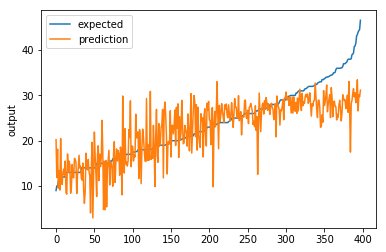

In [51]:
chart_regression2(oos_pred[0].values, oos_y[0].values, sort=True)

# Fim